# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Importing the Dataset

In [3]:
data = pd.read_csv("D:\stroke_prediction_dataset.csv")

In [4]:
data.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

# Classification Of Dataset(Numerical or Categorical)

In [6]:
data_types = data.dtypes
print("Data Types of Columns In Dataset:")
print(data_types)

Data Types of Columns In Dataset:
Patient ID                    int64
Patient Name                 object
Age                           int64
Gender                       object
Hypertension                  int64
Heart Disease                 int64
Marital Status               object
Work Type                    object
Residence Type               object
Average Glucose Level       float64
Body Mass Index (BMI)       float64
Smoking Status               object
Alcohol Intake               object
Physical Activity            object
Stroke History                int64
Family History of Stroke     object
Dietary Habits               object
Stress Levels               float64
Blood Pressure Levels        object
Cholesterol Levels           object
Symptoms                     object
Diagnosis                    object
dtype: object


In [7]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
categorical_columns = data.select_dtypes(include=['object'])

print("\nNumerical Columns:")
print(numerical_columns)


Numerical Columns:
       Patient ID  Age  Hypertension  Heart Disease  Average Glucose Level  \
0           18153   56             0              1                 130.91   
1           62749   80             0              0                 183.73   
2           32145   26             1              1                 189.00   
3            6154   73             0              0                 185.29   
4           48973   51             1              1                 177.34   
...           ...  ...           ...            ...                    ...   
14995       13981   88             1              1                 160.22   
14996       87707   47             0              0                 107.58   
14997       33174   35             0              0                 134.90   
14998       22343   73             0              0                 169.42   
14999       11066   64             0              0                 186.88   

       Body Mass Index (BMI)  Stroke Histor

In [8]:
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
            Patient Name  Gender Marital Status       Work Type  \
0        Mamooty Khurana    Male        Married   Self-employed   
1      Kaira Subramaniam    Male         Single   Self-employed   
2          Dhanush Balan    Male        Married    Never Worked   
3            Ivana Baral    Male        Married    Never Worked   
4      Darshit Jayaraman    Male       Divorced   Self-employed   
...                  ...     ...            ...             ...   
14995          Keya Iyer  Female       Divorced   Self-employed   
14996       Anahita Virk  Female        Married         Private   
14997         Ivana Kaur    Male        Married  Government Job   
14998        Anvi Mannan    Male         Single   Self-employed   
14999      Gokul Trivedi  Female         Single    Never Worked   

      Residence Type    Smoking Status    Alcohol Intake Physical Activity  \
0              Rural        Non-smoker    Social Drinker          Moderate   
1              Ur

In [9]:
numerical_column_names = numerical_columns.columns
print("Numerical Column Names: \n")
print(numerical_column_names)

Numerical Column Names: 

Index(['Patient ID', 'Age', 'Hypertension', 'Heart Disease',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Stroke History',
       'Stress Levels'],
      dtype='object')


In [10]:
categorical_column_names = categorical_columns.columns
print("Categorical Column Names: \n")
print(categorical_column_names)

Categorical Column Names: 

Index(['Patient Name', 'Gender', 'Marital Status', 'Work Type',
       'Residence Type', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Family History of Stroke', 'Dietary Habits',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')


In [11]:
num_numerical_columns = len(numerical_columns.columns)
num_categorical_columns = len(categorical_columns.columns)

print("\nNumber of Numerical Columns:", num_numerical_columns)
print("Number of Categorical Columns:", num_categorical_columns)


Number of Numerical Columns: 8
Number of Categorical Columns: 14


# Taking Care Of Missing Values

In [12]:
data.isnull().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [13]:
missing_values = data.isnull().sum()

for column, count in missing_values.items():
    if count > 0:
        print(f"Column'{column}'has {count} missing value(s).")

Column'Symptoms'has 2500 missing value(s).


In [14]:
mode_value = data['Symptoms'].mode()[0]

data['Symptoms'].fillna(mode_value, inplace=True)

In [15]:
data.isnull().sum()

Patient ID                  0
Patient Name                0
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Cholesterol Levels          0
Symptoms                    0
Diagnosis                   0
dtype: int64

# Taking Care Of Duplicate Values

In [16]:
duplicates = data[data.duplicated()]

if not duplicates.empty:
    duplicate_columns = data.columns[data.duplicated(keep=False)]
    print("Columns with Duplicates:")
    print(duplicate_columns)
else:
    print("No duplicates found.")

No duplicates found.


# Splitting The Columns

In [17]:
data[['Systolic', 'Diastolic']] = data['Blood Pressure Levels'].str.split('/', expand=True).astype(int)

data[['Systolic', 'Diastolic']]

,Systolic,Diastolic
0,140,108
1,146,91
2,154,97
3,174,81
4,121,95
...,...,...
14995,171,92
14996,155,71
14997,121,110
14998,157,74


In [18]:
data['HDL'] = data['Cholesterol Levels'].str.extract(r'HDL: (\d+)').astype(int)
data['LDL'] = data['Cholesterol Levels'].str.extract(r'LDL: (\d+)').astype(int)

data[['HDL', 'LDL']]

,HDL,LDL
0,68,133
1,63,70
2,59,95
3,70,137
4,65,68
...,...,...
14995,44,153
14996,35,183
14997,57,159
14998,79,91


# Dropping The Column

In [19]:
data.drop(columns=['Blood Pressure Levels','Cholesterol Levels'],inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

# Describing The Data

In [21]:
data.describe(include='all')

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Symptoms,Diagnosis,Systolic,Diastolic,HDL,LDL
count,15000.000000,15000,15000.000000,15000,15000.000000,15000.000000,15000,15000,15000,15000.000000,...,15000.000000,15000,15000,15000.000000,15000,15000,15000.000000,15000.000000,15000.000000,15000.000000
unique,NaN,13818,NaN,2,NaN,NaN,3,4,2,NaN,...,NaN,2,7,NaN,5786,2,NaN,NaN,NaN,NaN
top,NaN,Ela Sarna,NaN,Male,NaN,NaN,Single,Private,Rural,NaN,...,NaN,Yes,Paleo,NaN,Difficulty Speaking,No Stroke,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,7622,NaN,NaN,5156,3863,7529,NaN,...,NaN,7592,2192,NaN,2768,7532,NaN,NaN,NaN,NaN
mean,49715.802867,NaN,54.035667,NaN,0.249000,0.502933,NaN,NaN,NaN,129.445209,...,0.500267,NaN,NaN,5.022694,NaN,NaN,135.048467,84.897667,55.064933,125.054267
std,29000.656642,NaN,21.063111,NaN,0.432448,0.500008,NaN,NaN,NaN,40.487792,...,0.500017,NaN,NaN,2.873223,NaN,NaN,26.367423,14.683872,14.845410,37.593233
min,1.000000,NaN,18.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,60.000000,...,0.000000,NaN,NaN,0.000000,NaN,NaN,90.000000,60.000000,30.000000,60.000000
25%,24562.000000,NaN,36.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,94.517500,...,0.000000,NaN,NaN,2.540000,NaN,NaN,112.000000,72.000000,42.000000,92.000000
50%,49448.000000,NaN,54.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,128.900000,...,1.000000,NaN,NaN,5.050000,NaN,NaN,135.000000,85.000000,55.000000,125.000000
75%,75112.000000,NaN,72.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,164.592500,...,1.000000,NaN,NaN,7.520000,NaN,NaN,158.000000,98.000000,68.000000,158.000000


In [22]:
unique_values_gender = data['Symptoms'].unique()


print("Unique values in 'Symptoms' column:", unique_values_gender)
value_counts_gender = data['Symptoms'].value_counts()
print("Unique values with counts in 'Gender' column:")
print(value_counts_gender)

Unique values in 'Symptoms' column: ['Difficulty Speaking, Headache'
 'Loss of Balance, Headache, Dizziness, Confusion' 'Seizures, Dizziness'
 ...
 'Numbness, Blurred Vision, Severe Fatigue, Blurred Vision, Difficulty Speaking'
 'Difficulty Speaking, Severe Fatigue, Headache'
 'Severe Fatigue, Numbness, Confusion, Dizziness, Loss of Balance']
Unique values with counts in 'Gender' column:
Difficulty Speaking                                                2768
Numbness                                                            254
Headache                                                            253
Blurred Vision                                                      251
Seizures                                                            249
                                                                   ... 
Headache, Headache, Dizziness, Loss of Balance                        1
Difficulty Speaking, Confusion, Headache, Dizziness                   1
Numbness, Dizziness, Confusion, S

# Dropping The Column

In [23]:
data.drop(['Patient ID', 'Patient Name'], axis='columns', inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  object 
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  object 
 5   Work Type                 15000 non-null  object 
 6   Residence Type            15000 non-null  object 
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  object 
 10  Alcohol Intake            15000 non-null  object 
 11  Physical Activity         15000 non-null  object 
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  object 
 14  Dietar

# Storing New Data

In [25]:
copied_data = data
copied_data.to_csv('stroke_prediction_cleansed_dataset.csv', index=False)

# Data Balance

In [26]:
data['Diagnosis'].value_counts()

No Stroke    7532
Stroke       7468
Name: Diagnosis, dtype: int64

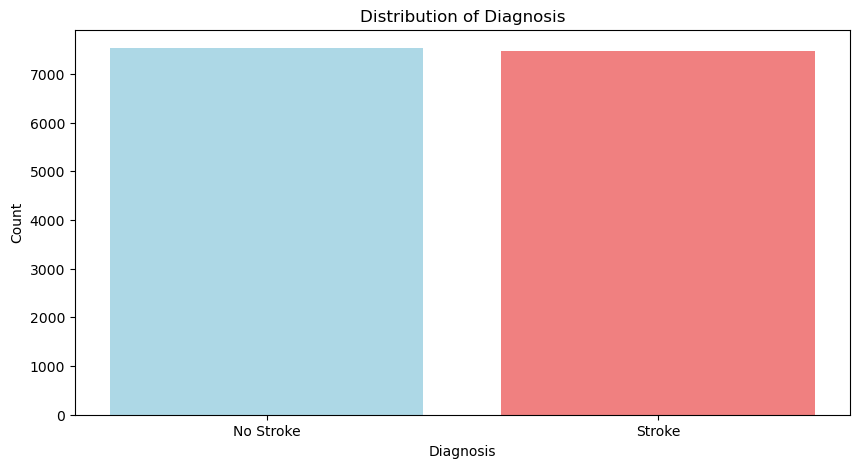

In [27]:
label = data['Diagnosis'].value_counts().index
values = data['Diagnosis'].value_counts().values
# Bar Chart

plt.figure(figsize=(10, 5))
plt.bar(label, values, color=["lightblue", "lightcoral"])
plt.title("Distribution of Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

The target variable,'Diagnosis',indicates whether an individual has experienced a stroke('Stroke')or not('No Stroke').The dataset is well-balanced, with nearly equal distribution of records for both categories, facilitating a comprehensive analysis.

# Likely distributions of the numeric variables

Numerical Columns:
['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']





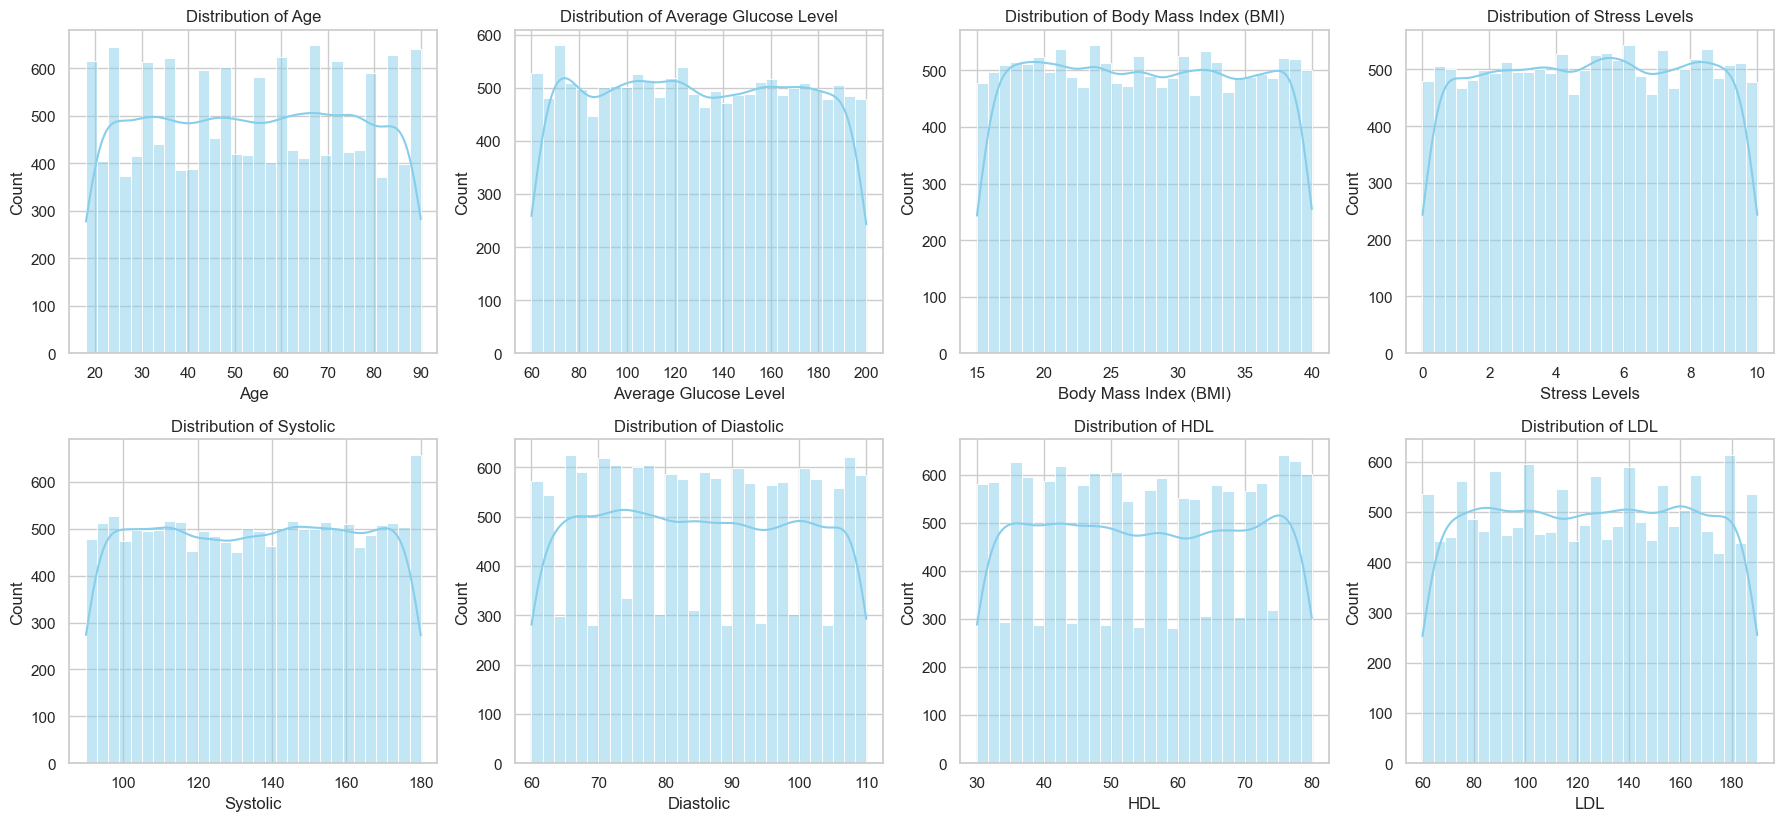

In [28]:
# Extracting numerical columns from dataset
numerical_columns = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

print("Numerical Columns:")
print(numerical_columns)
print("\n\n")

# Setting the style of seaborn
sns.set(style="whitegrid")

# Creating subplots for each numerical feature
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

This graph displays the distribution of various health-related metrics including age, average glucose level, body mass index (BMI), stress levels, systolic and diastolic blood pressure, and levels of HDL and LDL cholesterol. Each metric is plotted with counts on the y-axis and the metric’s values on the x-axis.

 - 
The average glucose level histogram shows a broad distribution with noticeable peaks.
The body mass index (BMI) histogram exhibits a distribution resembling normality, peaking around 25-30 BMI.
Systolic and diastolic blood pressure histograms display normal-like distributions centered at approximately 140 and 80, respectively.
HDL and LDL cholesterol histograms show varying counts across different levels without clear patterns.
Age and stress level histograms depict diverse counts with no clear patterns.

# Calculating Outliers

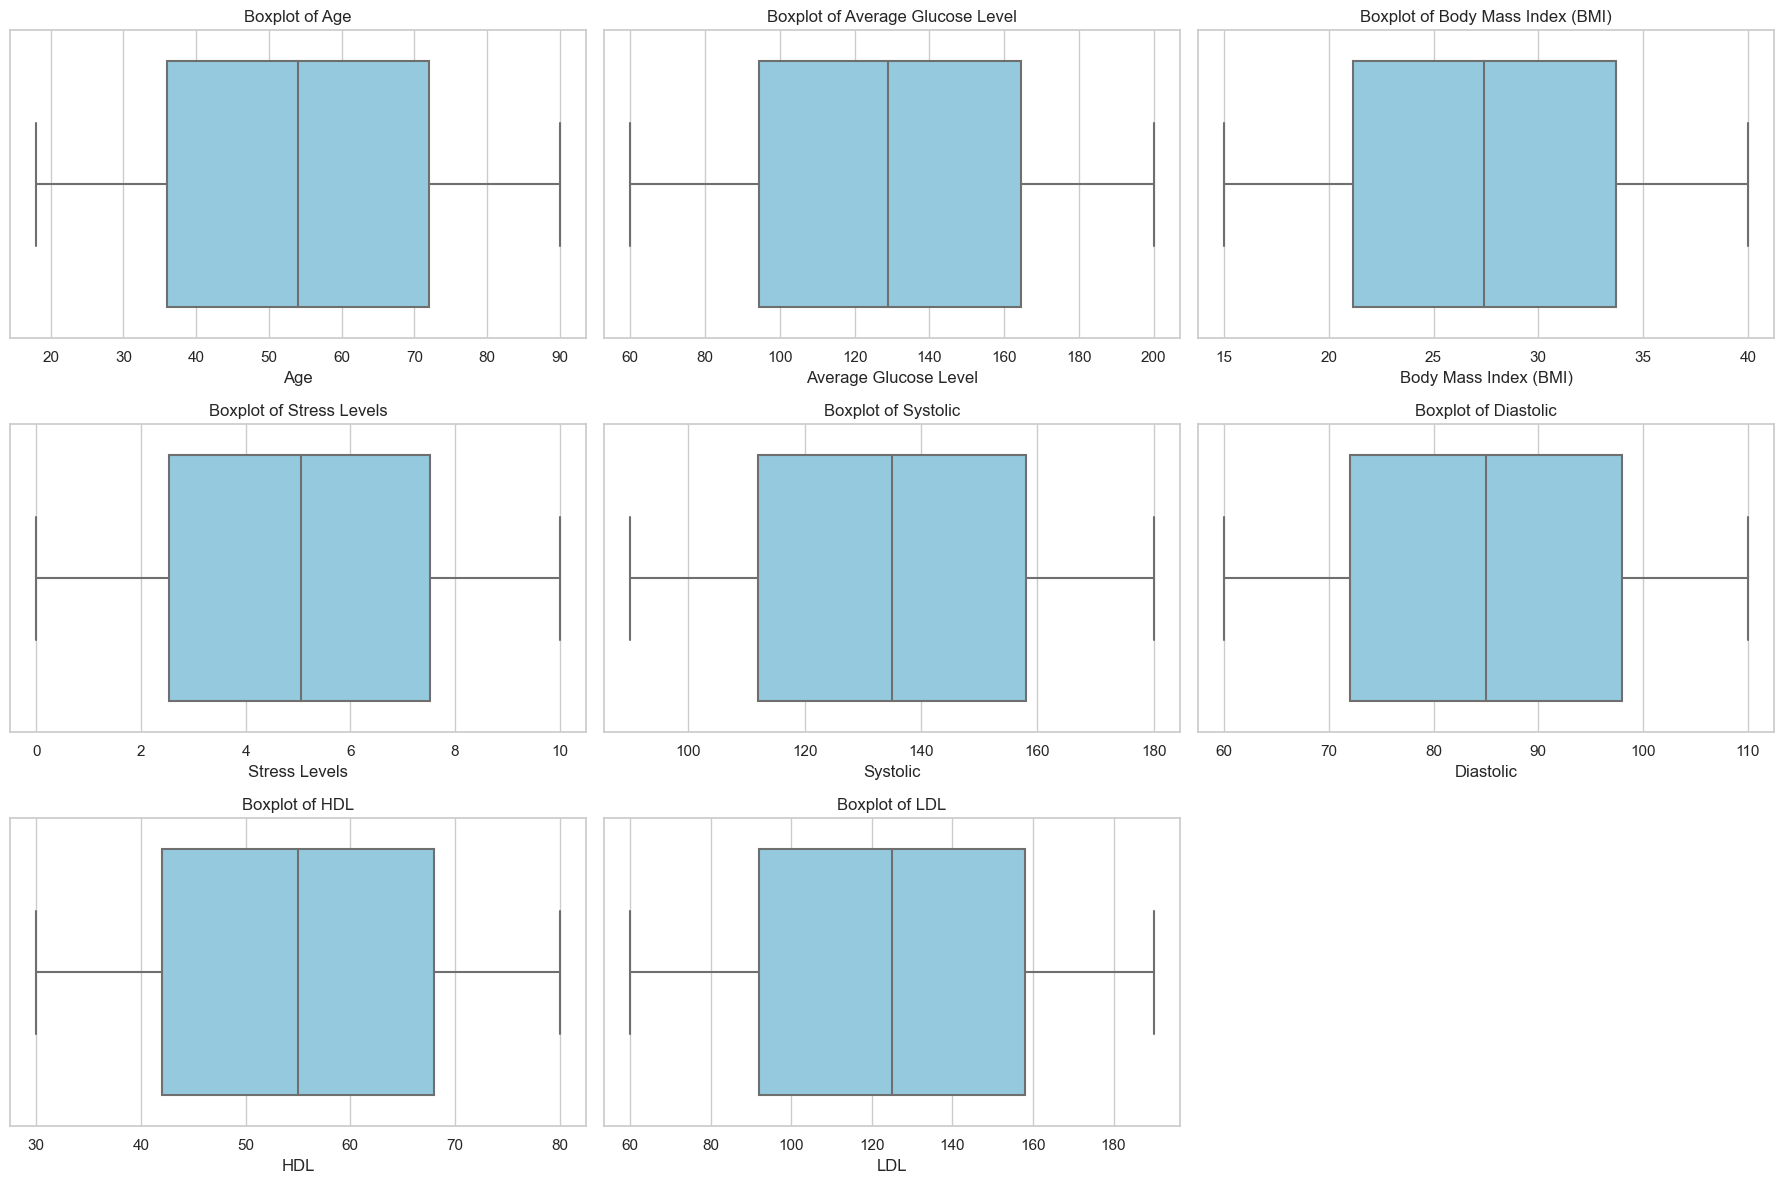

In [29]:
# Draw boxplots to find potential outliers

# Calculate the number of needed rows and columns based on the number of numerical columns
num_numerical_columns = len(numerical_columns)
num_rows = (num_numerical_columns - 1) // 3 + 1
num_cols = min(3, num_numerical_columns)

# Set up the grid layout for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows), sharey=True)

# Flatten the axes array to iterate through the subplots
axes = axes.flatten()

# Loop through numerical columns and create boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=data[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')

# Hide empty subplots
for j in range(num_numerical_columns, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


According to the boxplot, there are no outliers present. This means that all the values in the dataset fall within the range of the whiskers.

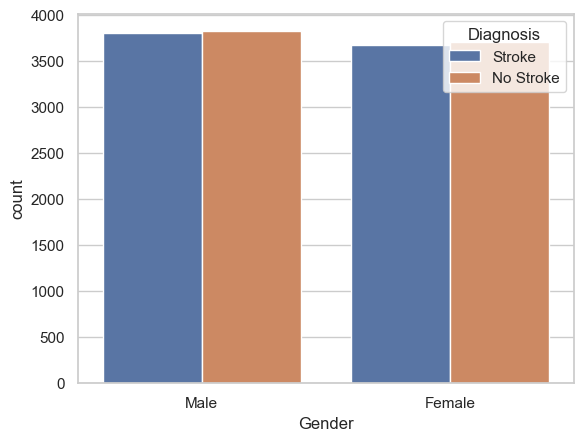

In [30]:
sns.countplot(data=data, x='Gender', hue='Diagnosis')
plt.show()

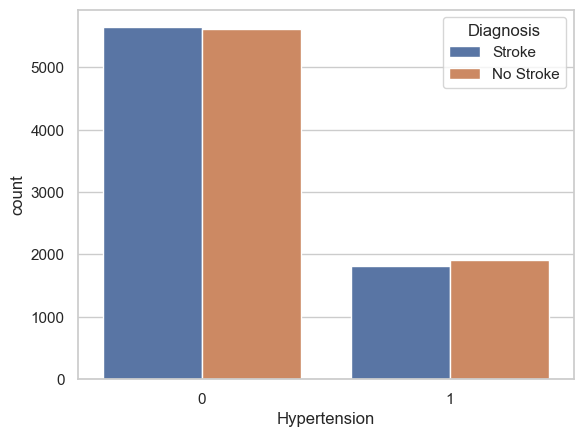

In [31]:
sns.countplot(data=data, x='Hypertension', hue='Diagnosis')
plt.show()

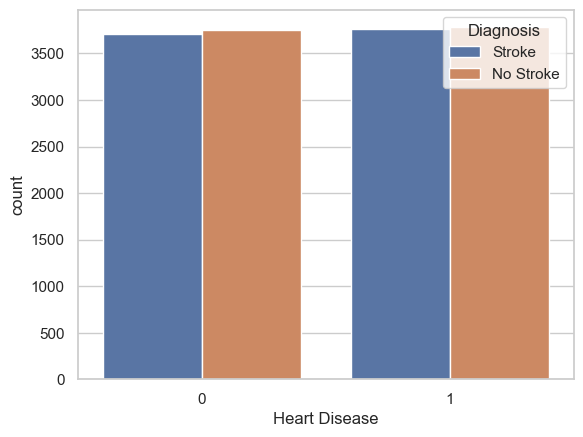

In [32]:
sns.countplot(data=data, x='Heart Disease', hue='Diagnosis')
plt.show()

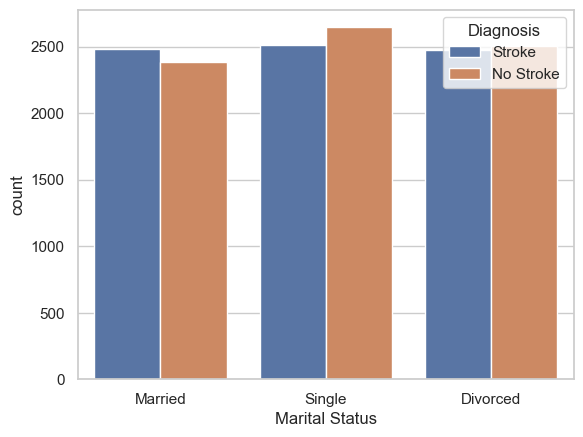

In [33]:
sns.countplot(data=data, x='Marital Status', hue='Diagnosis')
plt.show()

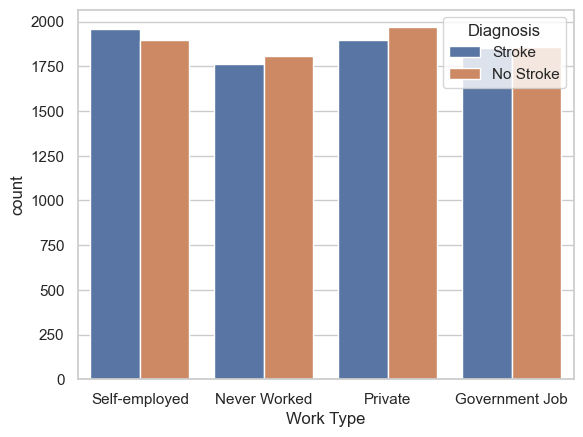

In [34]:
sns.countplot(data=data, x='Work Type', hue='Diagnosis')
plt.show()

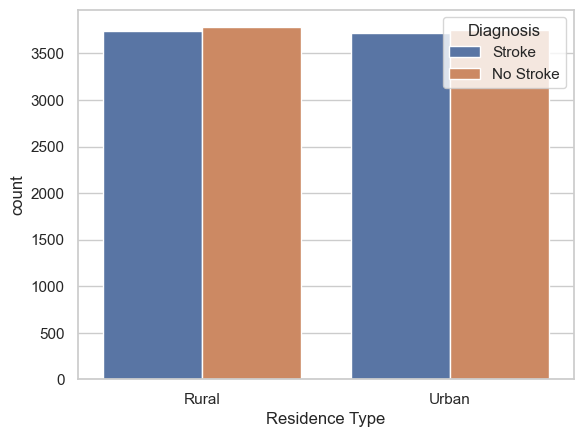

In [35]:
sns.countplot(data=data, x='Residence Type', hue='Diagnosis')
plt.show()

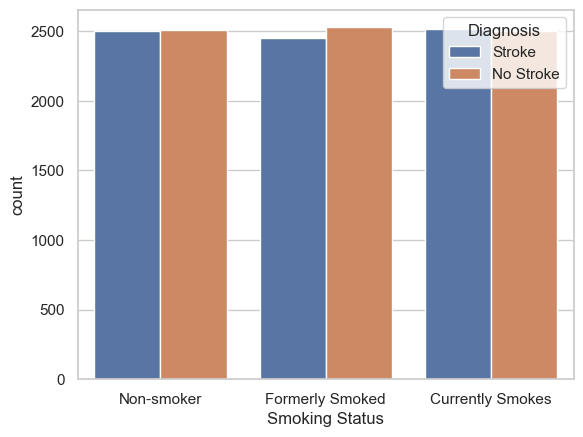

In [36]:
sns.countplot(data=data, x='Smoking Status', hue='Diagnosis')
plt.show()

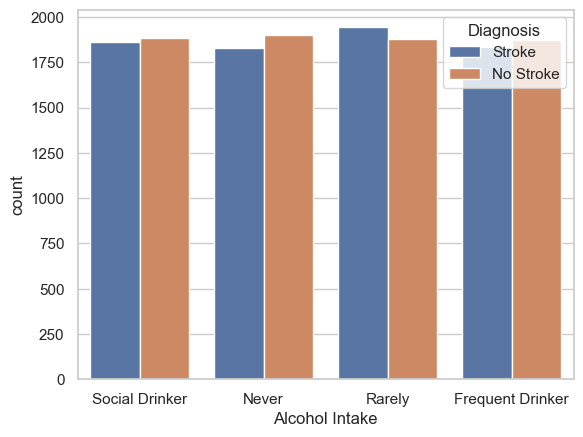

In [37]:
sns.countplot(data=data, x='Alcohol Intake', hue='Diagnosis')
plt.show()

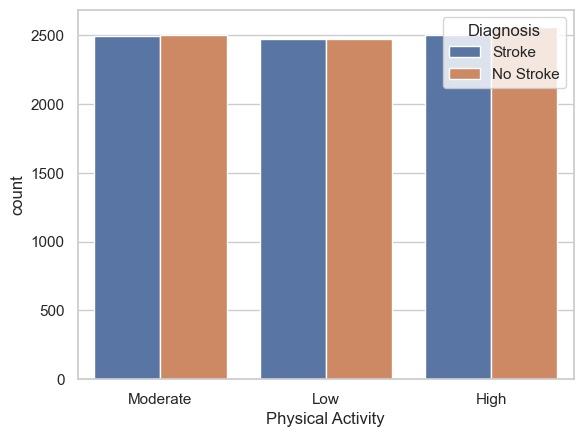

In [38]:
sns.countplot(data=data, x='Physical Activity', hue='Diagnosis')
plt.show()

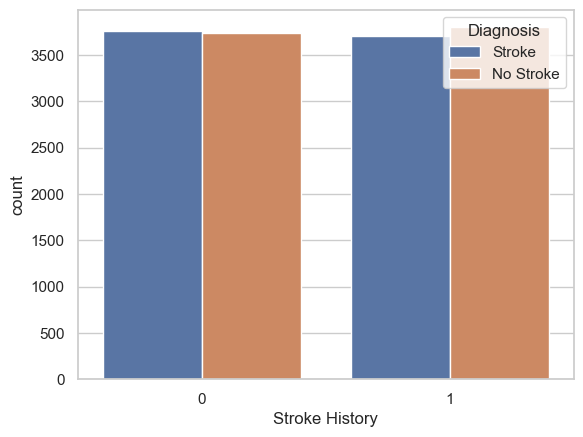

In [39]:
sns.countplot(data=data, x='Stroke History', hue='Diagnosis')
plt.show()

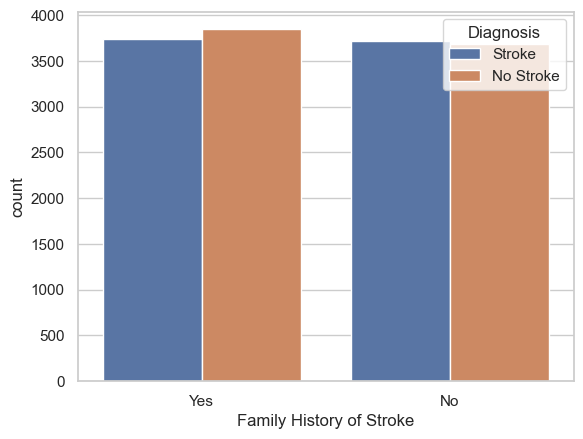

In [40]:
sns.countplot(data=data, x='Family History of Stroke', hue='Diagnosis')
plt.show()

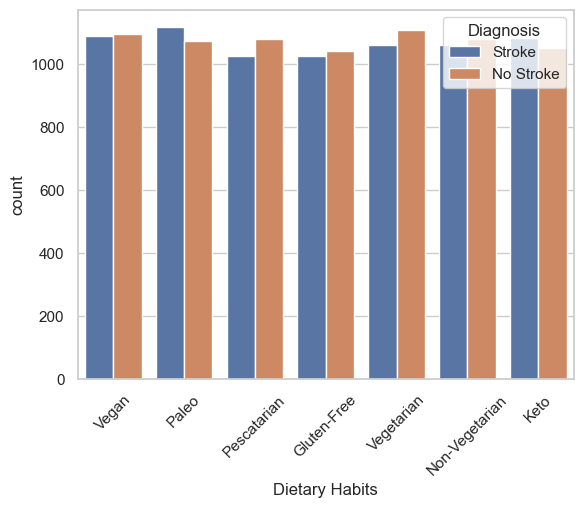

In [41]:
sns.countplot(data=data, x='Dietary Habits', hue='Diagnosis')
plt.xticks(rotation=45)
plt.show()

# Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

categorical_columns = ['Gender', 'Hypertension', 'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Stroke History', 'Family History of Stroke', 'Dietary Habits', 'Symptoms']

for column in categorical_columns:
    data[column] = labelencoder.fit_transform(data[column])

data.head(10)

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Symptoms,Diagnosis,Systolic,Diastolic,HDL,LDL
0,56,1,0,1,1,3,0,130.91,22.37,2,...,0,1,5,3.48,1375,Stroke,140,108,68,133
1,80,1,0,0,2,3,1,183.73,32.57,2,...,0,0,3,1.73,3146,Stroke,146,91,63,70
2,26,1,1,1,1,1,0,189.00,20.32,1,...,0,1,3,7.31,4201,Stroke,154,97,59,95
3,73,1,0,0,1,1,1,185.29,27.50,2,...,0,0,3,5.35,4059,No Stroke,174,81,70,137
4,51,1,1,1,0,3,1,177.34,29.06,0,...,0,1,4,6.84,1150,Stroke,121,95,65,68
5,62,0,0,0,2,2,1,91.60,37.47,0,...,0,0,0,4.85,4637,Stroke,132,64,80,69
6,40,0,1,0,1,2,1,77.83,28.20,0,...,1,0,6,6.38,1150,No Stroke,178,105,31,134
7,61,0,0,1,0,0,0,194.73,26.44,1,...,1,0,5,5.85,2911,Stroke,179,72,66,134
8,72,0,1,1,1,3,0,72.99,30.10,1,...,1,0,6,0.73,3075,Stroke,141,106,71,140
9,82,1,0,0,0,3,1,111.23,28.83,0,...,1,1,2,8.39,1150,No Stroke,119,88,32,88


In [44]:
# Creating a copy of cleansed dataset
copied_data = data
copied_data.to_csv('stroke_prediction_processed_dataset.csv', index=False)

# Studying and Visualizing the Data

In [45]:
# Processed dataset copy
dataframe = data

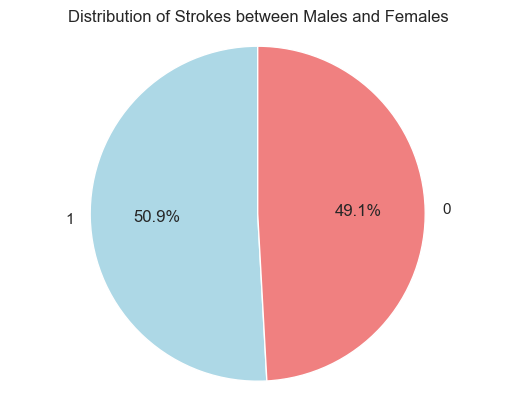

In [46]:
# Data Analysis based on Gender
stroke_counts = dataframe[dataframe['Diagnosis'] == 'Stroke']['Gender'].value_counts()

# Creating a pie chart depicting distribution of stroke based on gender
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.axis('equal')
plt.title('Distribution of Strokes between Males and Females')
plt.savefig("1.png")
plt.show()

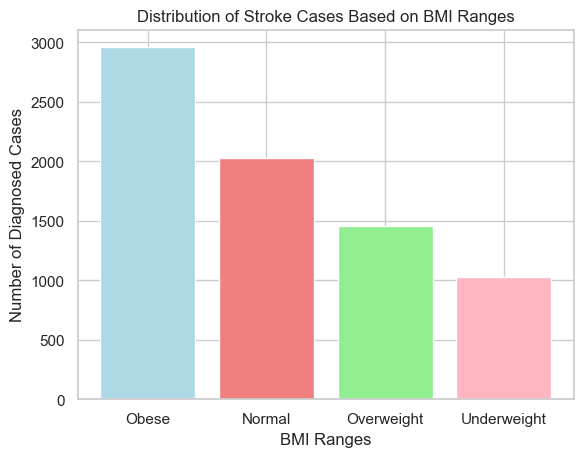

In [47]:
# Data Analysis based on Body Mass Index
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

dataframe['BMI Range'] = pd.cut(dataframe['Body Mass Index (BMI)'], bins=bins, labels=labels, include_lowest=True)

# Count the number of strokes for each BMI range
stroke_counts = dataframe[dataframe['Diagnosis'] == 'Stroke']['BMI Range'].value_counts()

# Creating a bar plot depicting distribution of stroke based on BMI ranges
plt.bar(stroke_counts.index, stroke_counts, color=['lightblue', 'lightcoral', 'lightgreen', 'lightpink'])
plt.title('Distribution of Stroke Cases Based on BMI Ranges')
plt.xlabel('BMI Ranges')
plt.ylabel('Number of Diagnosed Cases')
plt.savefig('stroke_distribution_bmi.png')
plt.show()

# Remove the temporary 'BMI Range' column
dataframe.drop('BMI Range', axis=1, inplace=True)

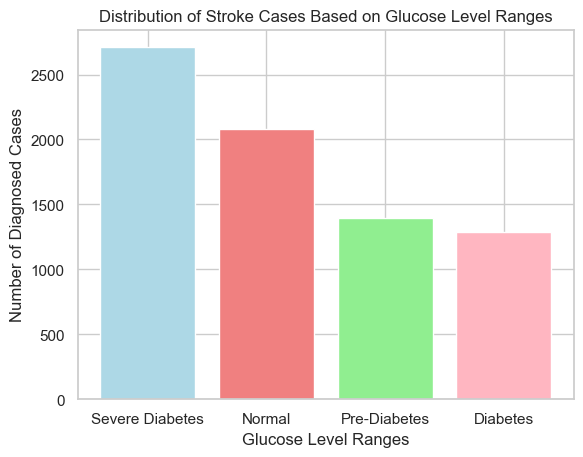

In [48]:
#Data Analysis based on 'Average Glucose Level'
glucose_bins = [0, 99, 125, 150, float('inf')]
glucose_labels = ['Normal', 'Pre-Diabetes', 'Diabetes', 'Severe Diabetes']

dataframe['Glucose Level Range'] = pd.cut(dataframe['Average Glucose Level'], bins=glucose_bins, labels=glucose_labels, include_lowest=True)

# Count the number of strokes for each glucose level range
stroke_counts_glucose = dataframe[dataframe['Diagnosis'] == 'Stroke']['Glucose Level Range'].value_counts()

# Creating a bar plot depicting distribution of stroke based on glucose level ranges
plt.bar(stroke_counts_glucose.index, stroke_counts_glucose, color=['lightblue', 'lightcoral', 'lightgreen', 'lightpink'])
plt.title('Distribution of Stroke Cases Based on Glucose Level Ranges')
plt.xlabel('Glucose Level Ranges')
plt.ylabel('Number of Diagnosed Cases')
plt.savefig('stroke_distribution_glucose.png')
plt.show()

# Remove the temporary 'Glucose Level Range' column
dataframe.drop('Glucose Level Range', axis=1, inplace=True)


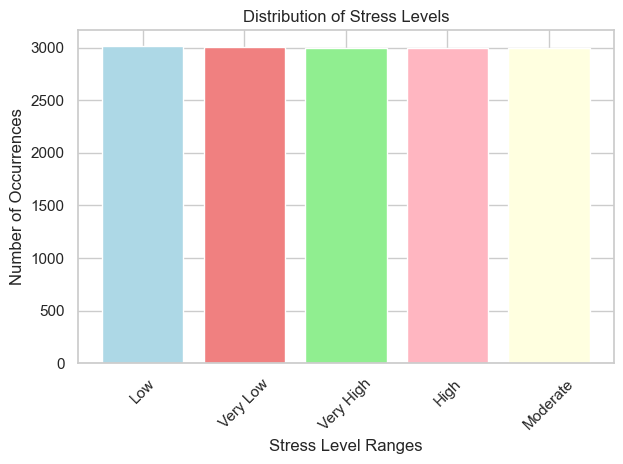

In [49]:
# Data Analysis based on Stress Levels
stress_ranges = [0, 2, 4, 6, 8, 10]
stress_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

dataframe['Stress Level Range'] = pd.qcut(dataframe['Stress Levels'], q=5, labels=False, precision=1, duplicates='drop')

# Map the numeric labels to the custom labels
data['Stress Level Range'] = dataframe['Stress Level Range'].map(dict(enumerate(stress_labels)))

# Count the number of occurrences for each stress level range
stress_counts = dataframe['Stress Level Range'].value_counts()

# Creating a bar plot depicting distribution of stress levels
plt.bar(stress_counts.index, stress_counts, color=['lightblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightyellow'])
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level Ranges')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Remove the temporary 'Stress Level Range' column
dataframe.drop('Stress Level Range', axis=1, inplace=True)


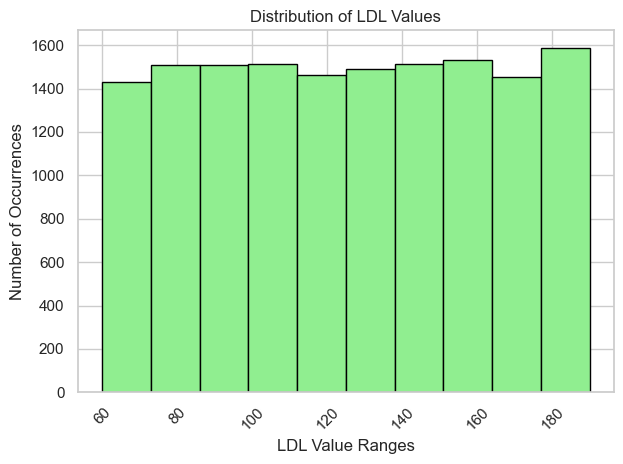

In [50]:
# Data Analysis based on Stress LDL - Blood Pressure
# Creating a histogram-like bar plot depicting distribution of LDL values
plt.hist(data['LDL'], bins=10, color='lightgreen', edgecolor='black') 
plt.title('Distribution of LDL Values')
plt.xlabel('LDL Value Ranges')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


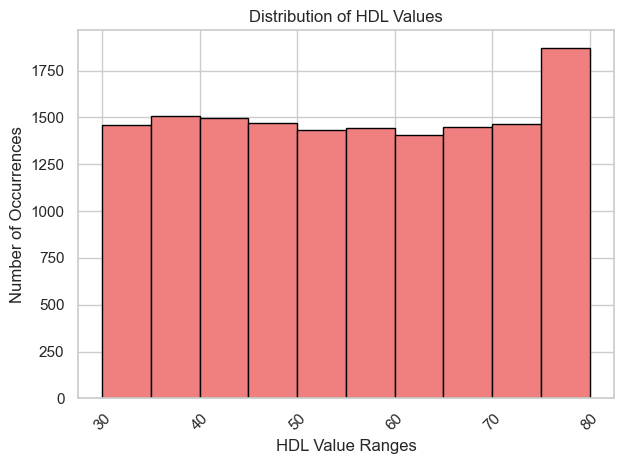

In [51]:
# Data Analysis based on Stress HDL - Blood Pressure

# Creating a histogram-like bar plot depicting distribution of HDL values
plt.hist(data['HDL'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of HDL Values')
plt.xlabel('HDL Value Ranges')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
from sklearn.impute import SimpleImputer
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [53]:
dataframe.corr()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Symptoms,Diagnosis,Systolic,Diastolic,HDL,LDL
Age,1.000000,0.001001,0.013378,-0.003900,-0.003902,0.007753,0.002118,-0.005768,-0.008494,-0.001549,...,0.005503,-0.013540,-0.002255,0.007797,0.002164,-0.002060,0.001668,-0.009049,-0.008077,-0.000552
Gender,0.001001,1.000000,0.006513,0.005239,0.000903,0.002205,-0.001137,-0.005521,-0.003510,0.012076,...,0.003458,-0.000733,-0.002674,-0.012442,0.007461,0.001136,0.005015,0.003478,0.021084,0.008777
Hypertension,0.013378,0.006513,1.000000,0.002326,-0.001843,0.006750,0.001764,-0.006343,-0.000653,-0.000283,...,0.008480,0.014675,0.008454,0.003119,-0.009678,-0.011572,-0.002351,-0.005058,0.003619,-0.004026
Heart Disease,-0.003900,0.005239,0.002326,1.000000,-0.018090,-0.004703,0.010556,0.014327,-0.000317,0.003427,...,-0.013870,0.007395,-0.001810,-0.009702,-0.001357,0.001892,0.011441,-0.018643,-0.001490,-0.000636
Marital Status,-0.003902,0.000903,-0.001843,-0.018090,1.000000,0.008514,-0.003676,-0.014447,0.021738,-0.010517,...,-0.000819,-0.002771,-0.010953,-0.006346,0.011600,-0.008537,0.009224,0.017201,0.001801,0.006778
Work Type,0.007753,0.002205,0.006750,-0.004703,0.008514,1.000000,-0.003602,0.009653,-0.014057,0.005821,...,0.000286,0.009900,0.009063,0.011983,0.009352,0.004788,0.004538,-0.005296,0.015881,-0.000222
Residence Type,0.002118,-0.001137,0.001764,0.010556,-0.003676,-0.003602,1.000000,0.002624,0.011665,-0.018109,...,-0.001198,-0.009420,-0.005100,-0.003166,-0.003016,0.000384,0.015287,-0.000231,0.014918,0.010029
Average Glucose Level,-0.005768,-0.005521,-0.006343,0.014327,-0.014447,0.009653,0.002624,1.000000,-0.006088,0.013874,...,-0.003498,0.005956,0.017640,0.001031,-0.011068,0.015627,-0.002082,0.006736,0.007347,0.005186
Body Mass Index (BMI),-0.008494,-0.003510,-0.000653,-0.000317,0.021738,-0.014057,0.011665,-0.006088,1.000000,0.008879,...,-0.003853,-0.001165,-0.000867,0.006069,0.009276,-0.010184,-0.000131,0.007813,0.006147,0.013217
Smoking Status,-0.001549,0.012076,-0.000283,0.003427,-0.010517,0.005821,-0.018109,0.013874,0.008879,1.000000,...,0.000163,0.009301,-0.004947,0.010279,0.003558,-0.001469,0.009816,-0.001212,0.009408,0.000402


<AxesSubplot:>

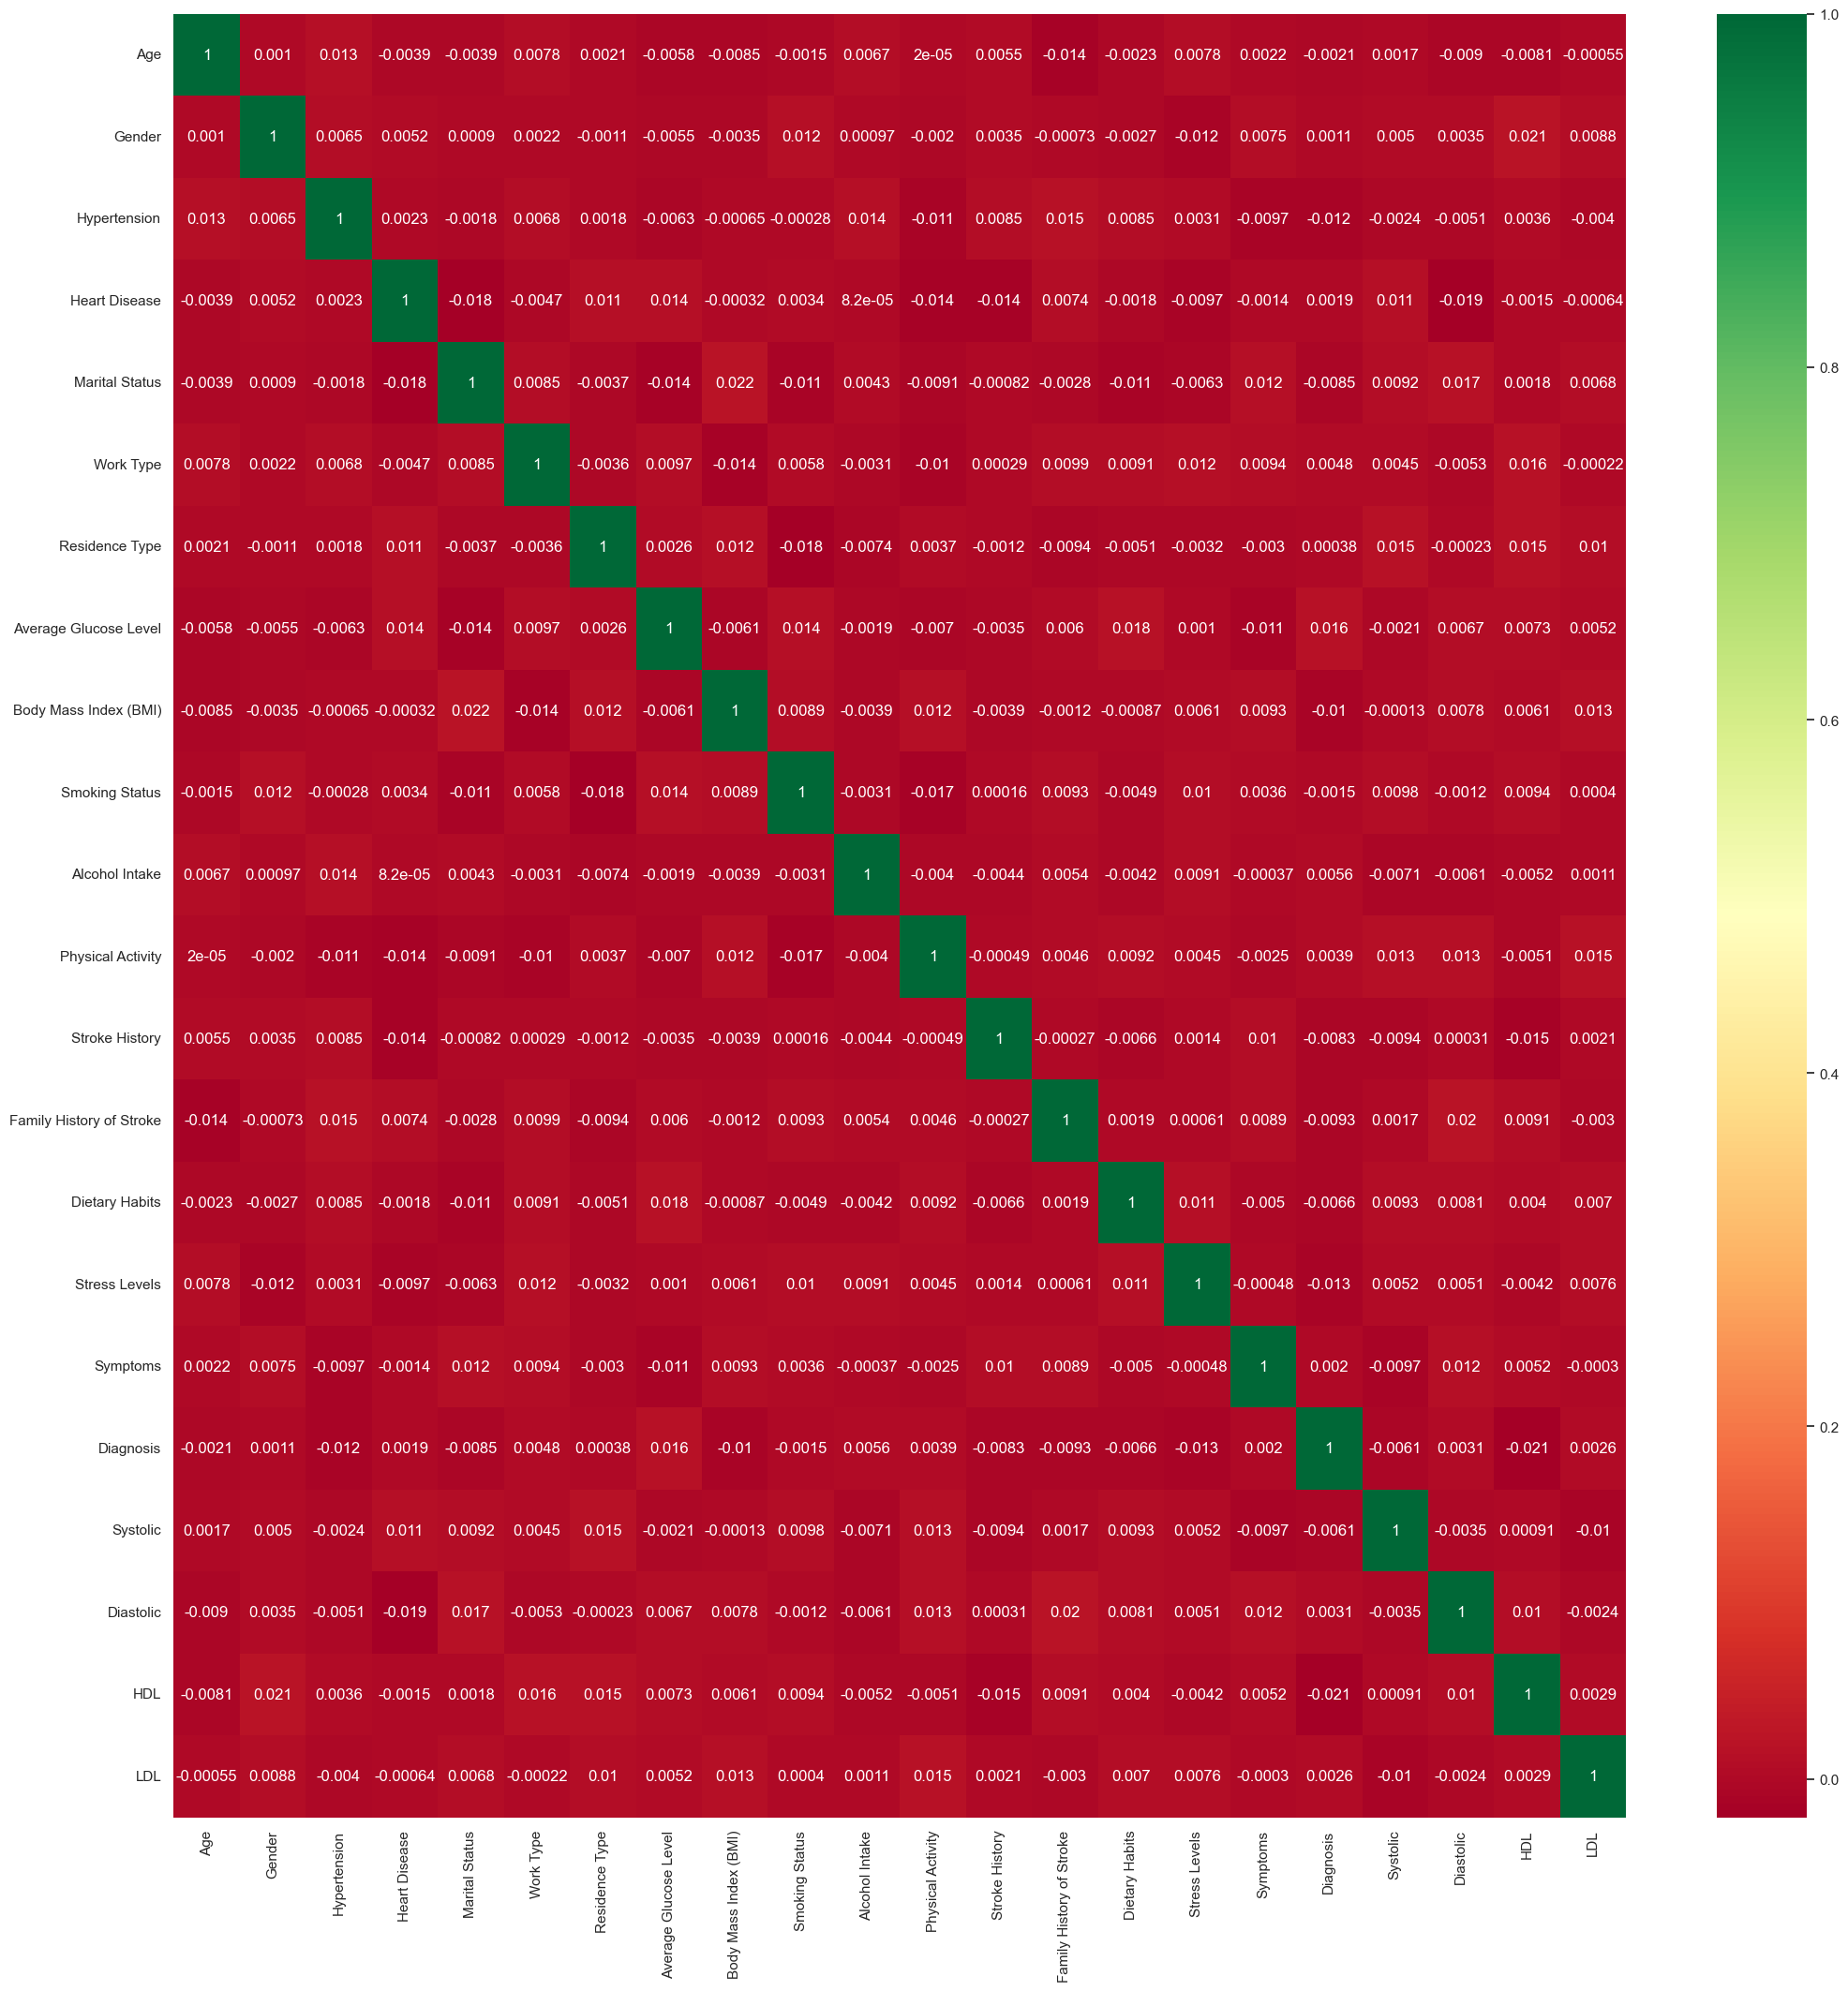

In [54]:
# Create the heat map of the correlation
plt.figure(figsize=(25, 25))
sns.heatmap(dataframe.corr(), annot=True, cmap='RdYlGn')

In [55]:
dataframe.head()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Symptoms,Diagnosis,Systolic,Diastolic,HDL,LDL
0,56,1,0,1,1,3,0,130.91,22.37,2,...,0,1,5,3.48,1375,1,140,108,68,133
1,80,1,0,0,2,3,1,183.73,32.57,2,...,0,0,3,1.73,3146,1,146,91,63,70
2,26,1,1,1,1,1,0,189.00,20.32,1,...,0,1,3,7.31,4201,1,154,97,59,95
3,73,1,0,0,1,1,1,185.29,27.50,2,...,0,0,3,5.35,4059,0,174,81,70,137
4,51,1,1,1,0,3,1,177.34,29.06,0,...,0,1,4,6.84,1150,1,121,95,65,68


In [56]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  int32  
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  int32  
 5   Work Type                 15000 non-null  int32  
 6   Residence Type            15000 non-null  int32  
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  int32  
 10  Alcohol Intake            15000 non-null  int32  
 11  Physical Activity         15000 non-null  int32  
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  int32  
 14  Dietar

In [57]:
# Get the dimensions (number of rows and columns) of the DataFrame
dataframe.shape

(15000, 22)

# Feature Selection

# 1.Filter Method

Mutual Information

Mutual Information Scores:
 Age                         0.004510
Gender                      0.000533
Hypertension                0.002049
Heart Disease               0.006157
Marital Status              0.000000
Work Type                   0.003538
Residence Type              0.000000
Average Glucose Level       0.000245
Body Mass Index (BMI)       0.001704
Smoking Status              0.000000
Alcohol Intake              0.000000
Physical Activity           0.000000
Stroke History              0.006434
Family History of Stroke    0.000000
Dietary Habits              0.000000
Stress Levels               0.004838
Symptoms                    0.000832
Systolic                    0.000000
Diastolic                   0.000000
HDL                         0.000632
LDL                         0.008858
dtype: float64


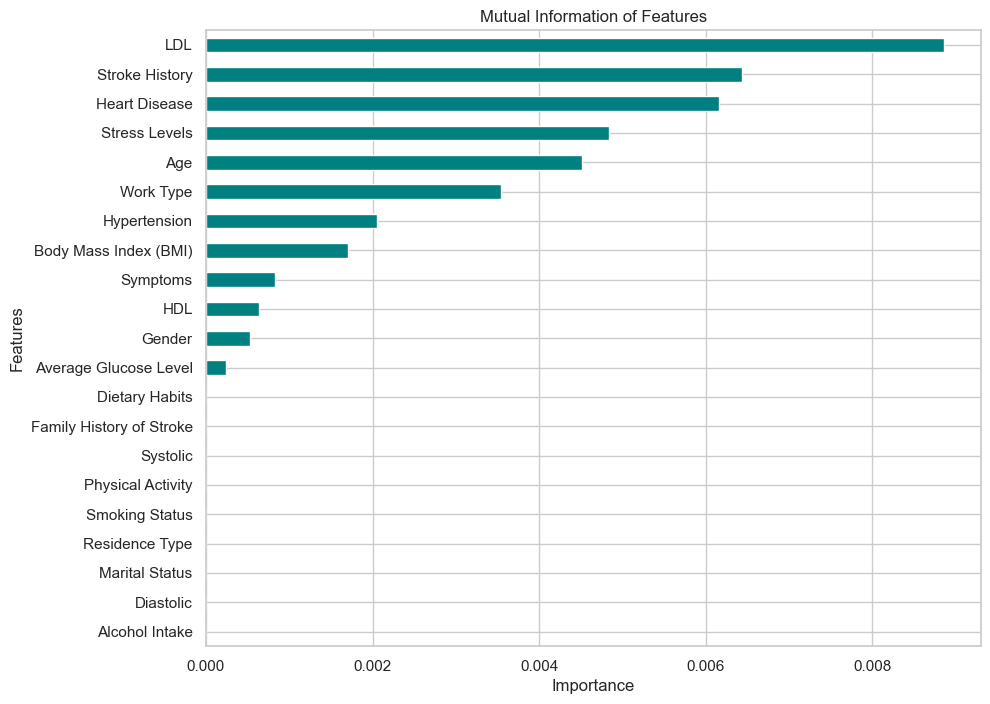

In [58]:
from sklearn.feature_selection import mutual_info_classif

# Extract features and target
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Calculate mutual information
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi,index=X.columns)
plt.figure(figsize=(10,8))
mi_series.sort_values().plot(kind='barh',color='teal')
print("Mutual Information Scores:\n", mi_series)
plt.title('Mutual Information of Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Fisher's Score

fisher_scores_series:
 Age                         0.063625
Gender                      0.019363
Hypertension                2.008820
Heart Disease               0.053674
Marital Status              1.093050
Work Type                   0.343778
Residence Type              0.002206
Average Glucose Level       3.663364
Body Mass Index (BMI)       1.555763
Smoking Status              0.032362
Alcohol Intake              0.478330
Physical Activity           0.226537
Stroke History              1.024455
Family History of Stroke    1.292210
Dietary Habits              0.646664
Stress Levels               2.438305
Symptoms                    0.062436
Systolic                    0.567100
Diastolic                   0.139808
HDL                         6.931402
LDL                         0.098285
dtype: float64


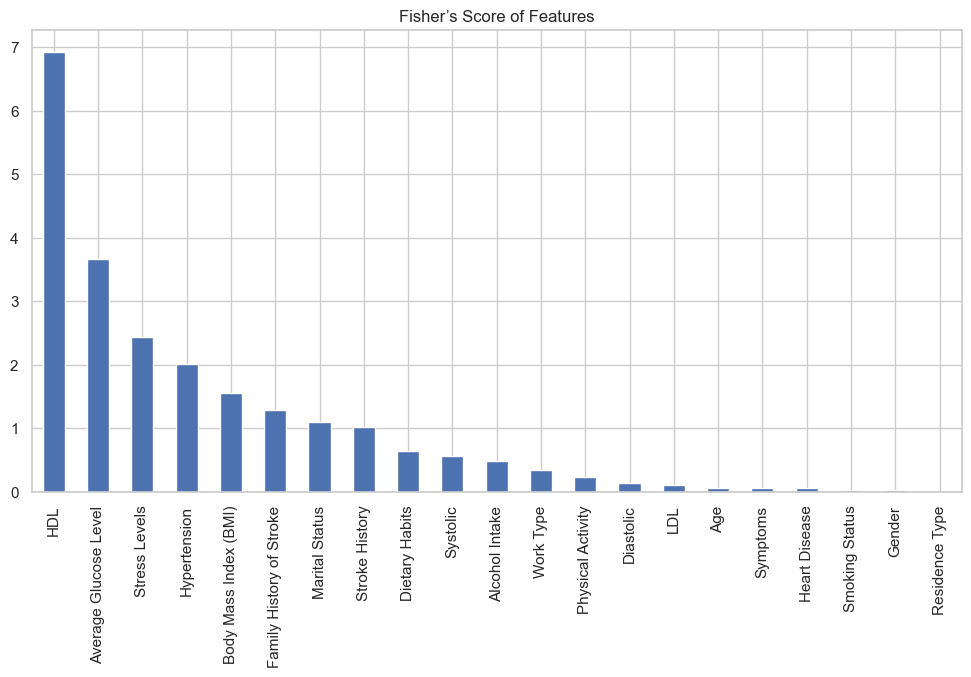

In [59]:
from sklearn.feature_selection import f_classif

# Fisher’s Score
fisher_scores, _ = f_classif(X, y)
fisher_scores_series = pd.Series(fisher_scores, index=X.columns)
fisher_scores_series.sort_values(ascending=False).plot.bar(figsize=(12, 6))
print("fisher_scores_series:\n",fisher_scores_series)
plt.title('Fisher’s Score of Features')
plt.show()

# 2. Wrapper Method 

Forward Feature Selection

In [60]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# Forward Feature Selection
forward_selector = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=5, direction='forward')
forward_selector.fit(X, y)
selected_features_forward = X.columns[forward_selector.get_support()]
print("Selected features (Forward Selection):\n", selected_features_forward)

Selected features (Forward Selection):
 Index(['Age', 'Work Type', 'Average Glucose Level', 'Physical Activity',
       'Dietary Habits'],
      dtype='object')


Backward feature elimination

In [61]:
# Backward feature elimination
sfs_backward = SequentialFeatureSelector(LogisticRegression(), direction='backward', n_features_to_select=10)
sfs_backward.fit(X, y)

# Get selected features
selected_features_backward = X.columns[sfs_backward.get_support()]
print("Selected features by backward elimination:\n", selected_features_backward)


Selected features by backward elimination:
 Index(['Age', 'Average Glucose Level', 'Body Mass Index (BMI)',
       'Alcohol Intake', 'Physical Activity', 'Stroke History',
       'Dietary Habits', 'Stress Levels', 'Systolic', 'HDL'],
      dtype='object')


# 3. Embedded Method

Random Forest feature importance

Selected features by Random Forest:
 Index(['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Work Type', 'Residence Type', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Stroke History', 'Family History of Stroke',
       'Dietary Habits', 'Stress Levels', 'Symptoms', 'Systolic', 'Diastolic',
       'HDL', 'LDL'],
      dtype='object')


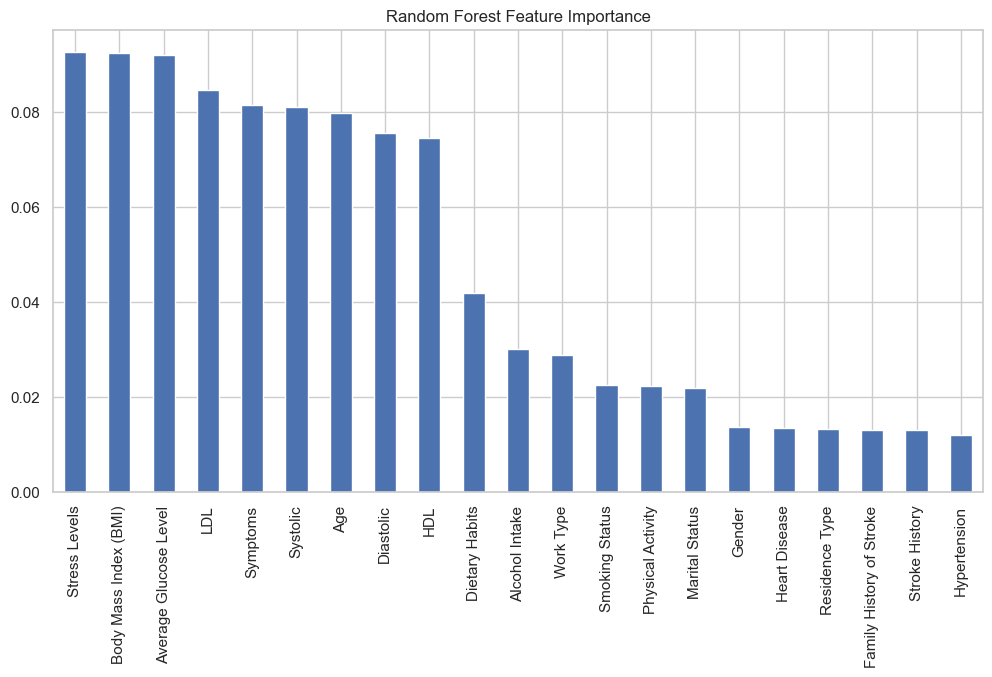

In [62]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
selected_features_rf = feature_importance_rf[feature_importance_rf > 0.01].index
print("Selected features by Random Forest:\n", selected_features_rf)

# Plot feature importances
feature_importance_rf.sort_values(ascending=False).plot.bar(figsize=(12, 6))
plt.title('Random Forest Feature Importance')
plt.show()

In [63]:
# Combine features from all methods
selected_features_combined =set(mi_series[mi_series > 0.01].index).union(
    set(selected_features_forward)).union(
    set(selected_features_backward)).union(
    set(selected_features_rf))

print("Final selected features:\n", selected_features_combined)

# Create a new DataFrame with the selected features
selected_data_combined = data_imputed[selected_features_combined]

Final selected features:
 {'Stroke History', 'Alcohol Intake', 'Work Type', 'Diastolic', 'Symptoms', 'Family History of Stroke', 'Physical Activity', 'Heart Disease', 'Marital Status', 'Smoking Status', 'LDL', 'HDL', 'Residence Type', 'Age', 'Systolic', 'Dietary Habits', 'Stress Levels', 'Hypertension', 'Average Glucose Level', 'Gender', 'Body Mass Index (BMI)'}


# Splitting The Dataset Into The Training Set And Test Set

In [64]:
X=dataframe.drop('Diagnosis',axis=1)

Y=dataframe['Diagnosis']

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

X_train,Y_train,X_test,Y_test

(       Age  Gender  Hypertension  Heart Disease  Marital Status  Work Type  \
 7410    18       0             0              1               0          1   
 10894   57       1             0              1               0          1   
 1934    61       0             0              1               2          3   
 11539   62       1             0              1               1          2   
 2952    38       1             0              0               2          2   
 ...    ...     ...           ...            ...             ...        ...   
 5191    45       1             1              0               0          0   
 13418   80       0             0              1               2          0   
 5390    46       0             1              1               2          2   
 860     23       1             1              0               2          3   
 7270    61       0             0              1               0          3   
 
        Residence Type  Average Glucose Level  Bod

# Logistic Regression

No Feature Scaling

In [65]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,Y_train)
Y_pred1=log.predict(X_test)
from sklearn.metrics import *
accuracy_score(Y_test,Y_pred1)

0.5093333333333333

In [66]:
precision_score(Y_test,Y_pred1)

0.5258426966292135

In [67]:
recall_score(Y_test,Y_pred1)

0.3677317967522263

In [68]:
f1_score(Y_test,Y_pred1)

0.4327990135635018

Mutual Information

In [69]:
# Select features with mutual information greater than a threshold
threshold = 0.002
selected_features = mi_series[mi_series > threshold].index.tolist()
valid_selected_features = [feature for feature in selected_features if feature in X.columns]
print("Valid selected features:\n", valid_selected_features)
#  the dataset with selected features
X_selected = X[valid_selected_features]
# Split the data into training and testing sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_selected, Y, test_size=0.25, random_state=42)

Valid selected features:
 ['Age', 'Hypertension', 'Heart Disease', 'Work Type', 'Stroke History', 'Stress Levels', 'LDL']


In [70]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train1,Y_train1)
Y_pred2=log.predict(X_test1)
from sklearn.metrics import *
accuracy_score(Y_test1,Y_pred2)

0.4976

In [71]:
precision_score(Y_test1,Y_pred2)

0.5092524056254626

In [72]:
recall_score(Y_test1,Y_pred2)

0.3603981141959141

In [73]:
f1_score(Y_test1,Y_pred2)

0.42208588957055215

Fisher's Score

In [74]:
selected_features1 = fisher_scores_series.sort_values(ascending=False).index[:5]  # Select top 5 features
print("selected features:\n", selected_features1)
# Subset your X data with selected features
X_selected1 = X[selected_features1]

# Splitting data into training and testing sets 
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_selected1, Y, test_size=0.25, random_state=42)

selected features:
 Index(['HDL', 'Average Glucose Level', 'Stress Levels', 'Hypertension',
       'Body Mass Index (BMI)'],
      dtype='object')


In [75]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train2,Y_train2)
Y_pred3=log.predict(X_test2)
from sklearn.metrics import *
accuracy_score(Y_test2,Y_pred3)

0.5058666666666667

In [76]:
precision_score(Y_test2,Y_pred3)

0.5213740458015267

In [77]:
recall_score(Y_test2,Y_pred3)

0.35777894185437403

In [78]:
f1_score(Y_test2,Y_pred3)

0.4243553898726312

Forward Feature Selection

In [79]:
X_selected = X[selected_features_forward]

# Splitting data into training and testing sets
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_selected, Y, test_size=0.25, random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train3,Y_train3)
Y_pred4=log.predict(X_test3)
from sklearn.metrics import *
accuracy_score(Y_test3,Y_pred4)

0.49173333333333336

In [81]:
precision_score(Y_test3,Y_pred4)

0.5011673151750973

In [82]:
recall_score(Y_test3,Y_pred4)

0.3373493975903614

In [83]:
f1_score(Y_test3,Y_pred4)

0.4032561051972448

Backward feature elimination

In [84]:
X_selected1 = X[selected_features_backward]

# Splitting data into training and testing sets
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X_selected1, Y, test_size=0.25, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train4,Y_train4)
Y_pred5=log.predict(X_test4)
from sklearn.metrics import *
accuracy_score(Y_test4,Y_pred5)

0.5101333333333333

In [86]:
precision_score(Y_test4,Y_pred5)

0.526431718061674

In [87]:
recall_score(Y_test4,Y_pred5)

0.3755893137768465

In [88]:
f1_score(Y_test4,Y_pred5)

0.4383980434118007

Random Forest feature importance

In [89]:
X_selected = X[selected_features_rf]

# Splitting data into training and testing sets
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X_selected, Y, test_size=0.25, random_state=42)

In [90]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train5,Y_train5)
Y_pred6=log.predict(X_test5)
from sklearn.metrics import *
accuracy_score(Y_test5,Y_pred6)

0.5093333333333333

In [91]:
precision_score(Y_test,Y_pred6)

0.5258426966292135

In [92]:
recall_score(Y_test5,Y_pred6)

0.3677317967522263

In [93]:
f1_score(Y_test5,Y_pred6)

0.4327990135635018

In [94]:
Final_data=pd.DataFrame({'Methods':['NFS','MI','FS','FFS','BFE','RFFI'],
                         'Accuracy':[accuracy_score(Y_test,Y_pred1),
                                accuracy_score(Y_test1,Y_pred2),
                                accuracy_score(Y_test2,Y_pred3),
                                accuracy_score(Y_test3,Y_pred4),
                                accuracy_score(Y_test4,Y_pred5),
                                accuracy_score(Y_test5,Y_pred6)],
                         'Precision':[precision_score(Y_test,Y_pred1),
                                precision_score(Y_test1,Y_pred2),
                                precision_score(Y_test2,Y_pred3),
                                precision_score(Y_test3,Y_pred4),
                                precision_score(Y_test4,Y_pred5),
                                precision_score(Y_test5,Y_pred6)],
                         'Recall':[recall_score(Y_test,Y_pred1),
                                   recall_score(Y_test1,Y_pred2),
                                   recall_score(Y_test2,Y_pred3),
                                   recall_score(Y_test3,Y_pred4),
                                   recall_score(Y_test4,Y_pred5),
                                   recall_score(Y_test5,Y_pred6)],
                         'F1_Score':[f1_score(Y_test,Y_pred1),
                               f1_score(Y_test1,Y_pred2),
                               f1_score(Y_test2,Y_pred3),
                               f1_score(Y_test3,Y_pred4),
                               f1_score(Y_test4,Y_pred5),
                               f1_score(Y_test5,Y_pred6)]})
Final_data

,Methods,Accuracy,Precision,Recall,F1_Score
0,NFS,0.509333,0.525843,0.367732,0.432799
1,MI,0.497600,0.509252,0.360398,0.422086
2,FS,0.505867,0.521374,0.357779,0.424355
3,FFS,0.491733,0.501167,0.337349,0.403256
4,BFE,0.510133,0.526432,0.375589,0.438398
5,RFFI,0.509333,0.525843,0.367732,0.432799


# Decision Tree Classifier

No Feature Scaling

In [96]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier()

dt.fit(X_train,Y_train)

Y_pred7=dt.predict(X_test)

accuracy_score(Y_test,Y_pred7)

0.5050666666666667

In [97]:
precision_score(Y_test,Y_pred7)

0.5141938939475094

In [98]:
recall_score(Y_test,Y_pred7)

0.5028810895756941

In [99]:
f1_score(Y_test,Y_pred7)

0.5084745762711865

Mutual Information

In [100]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier()

dt.fit(X_train1,Y_train1)

Y_pred8=dt.predict(X_test1)

accuracy_score(Y_test1,Y_pred8)

0.4938666666666667

In [101]:
precision_score(Y_test1,Y_pred8)

0.5029713668287412

In [102]:
recall_score(Y_test1,Y_pred8)

0.48768988999476165

In [103]:
f1_score(Y_test1,Y_pred8)

0.4952127659574468

Fisher's Score

In [104]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier()

dt.fit(X_train2,Y_train2)

Y_pred9=dt.predict(X_test2)

accuracy_score(Y_test2,Y_pred9)

0.5074666666666666

In [105]:
precision_score(Y_test2,Y_pred9)

0.5160788381742739

In [106]:
recall_score(Y_test2,Y_pred9)

0.5212152959664746

In [107]:
f1_score(Y_test2,Y_pred9)

0.5186343497524109

Forward Feature Selection

In [108]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier()

dt.fit(X_train3,Y_train3)

Y_pred10=dt.predict(X_test3)

accuracy_score(Y_test3,Y_pred10)

0.49093333333333333

In [109]:
precision_score(Y_test3,Y_pred10)

0.5

In [110]:
recall_score(Y_test3,Y_pred10)

0.47302252488213725

In [111]:
f1_score(Y_test3,Y_pred10)

0.48613728129205924

Backward Feature Elimination

In [112]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier()

dt.fit(X_train4,Y_train4)

Y_pred11=dt.predict(X_test4)

accuracy_score(Y_test4,Y_pred11)

0.5053333333333333

In [113]:
precision_score(Y_test4,Y_pred11)

0.5147702407002188

In [114]:
recall_score(Y_test4,Y_pred11)

0.4929282346778418

In [115]:
f1_score(Y_test4,Y_pred11)

0.5036125234145036

Random Forest Feature Importance

In [116]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier()

dt.fit(X_train5,Y_train5)

Y_pred12=dt.predict(X_test5)

accuracy_score(Y_test5,Y_pred12)

0.49173333333333336

In [117]:
precision_score(Y_test5,Y_pred12)

0.5007907221929362

In [118]:
recall_score(Y_test5,Y_pred12)

0.49764274489261395

In [119]:
f1_score(Y_test5,Y_pred12)

0.4992117708880715

In [120]:
Final_data=pd.DataFrame({'Methods':['NFS','MI','FS','FFS','BFE','RFFI'],
                         'Accuracy':[accuracy_score(Y_test,Y_pred7),
                                accuracy_score(Y_test1,Y_pred8),
                                accuracy_score(Y_test2,Y_pred9),
                                accuracy_score(Y_test3,Y_pred10),
                                accuracy_score(Y_test4,Y_pred11),
                                accuracy_score(Y_test5,Y_pred12)],
                         'Precision':[precision_score(Y_test,Y_pred7),
                                precision_score(Y_test1,Y_pred8),
                                precision_score(Y_test2,Y_pred9),
                                precision_score(Y_test3,Y_pred10),
                                precision_score(Y_test4,Y_pred11),
                                precision_score(Y_test5,Y_pred12)],
                         'Recall':[recall_score(Y_test,Y_pred7),
                                   recall_score(Y_test1,Y_pred8),
                                   recall_score(Y_test2,Y_pred9),
                                   recall_score(Y_test3,Y_pred10),
                                   recall_score(Y_test4,Y_pred11),
                                   recall_score(Y_test5,Y_pred12)],
                         'F1_Score':[f1_score(Y_test,Y_pred7),
                               f1_score(Y_test1,Y_pred8),
                               f1_score(Y_test2,Y_pred9),
                               f1_score(Y_test3,Y_pred10),
                               f1_score(Y_test4,Y_pred11),
                               f1_score(Y_test5,Y_pred12)]})
Final_data

,Methods,Accuracy,Precision,Recall,F1_Score
0,NFS,0.505067,0.514194,0.502881,0.508475
1,MI,0.493867,0.502971,0.487690,0.495213
2,FS,0.507467,0.516079,0.521215,0.518634
3,FFS,0.490933,0.500000,0.473023,0.486137
4,BFE,0.505333,0.514770,0.492928,0.503613
5,RFFI,0.491733,0.500791,0.497643,0.499212


# Random Forest Classifier

No Feature Scaling

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train,Y_train)

Y_pred13=rf.predict(X_test)

accuracy_score(Y_test,Y_pred13)

0.4952

In [122]:
precision_score(Y_test,Y_pred13)

0.5049019607843137

In [123]:
recall_score(Y_test,Y_pred13)

0.4316396018858041

In [124]:
f1_score(Y_test,Y_pred13)

0.46540525275345945

Mutual Information

In [125]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train1,Y_train1)

Y_pred14=rf.predict(X_test1)

accuracy_score(Y_test1,Y_pred14)

0.49866666666666665

In [126]:
precision_score(Y_test1,Y_pred14)

0.5083381253594019

In [127]:
recall_score(Y_test1,Y_pred14)

0.46306966998428495

In [128]:
f1_score(Y_test1,Y_pred14)

0.48464912280701755

Fisher's Score

In [129]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train2,Y_train2)

Y_pred15=rf.predict(X_test2)

accuracy_score(Y_test2,Y_pred15)

0.49893333333333334

In [130]:
precision_score(Y_test2,Y_pred15)

0.5082964601769911

In [131]:
recall_score(Y_test2,Y_pred15)

0.4814038763750655

In [132]:
f1_score(Y_test2,Y_pred15)

0.49448479956954533

Forward Feature Selection

In [133]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train3,Y_train3)

Y_pred16=rf.predict(X_test3)

accuracy_score(Y_test3,Y_pred16)

0.5

In [134]:
precision_score(Y_test3,Y_pred16)

0.5093406593406593

In [135]:
recall_score(Y_test3,Y_pred16)

0.4855945521215296

In [136]:
f1_score(Y_test3,Y_pred16)

0.49718423169750603

Backward Feature Elimination

In [137]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train4,Y_train4)

Y_pred17=rf.predict(X_test4)

accuracy_score(Y_test4,Y_pred17)

0.5106666666666667

In [138]:
precision_score(Y_test4,Y_pred17)

0.5221291866028708

In [139]:
recall_score(Y_test4,Y_pred17)

0.4573074908328968

In [140]:
f1_score(Y_test4,Y_pred17)

0.48757330354649536

Random Forest Feature Importance

In [141]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train5,Y_train5)

Y_pred18=rf.predict(X_test5)

accuracy_score(Y_test5,Y_pred18)

0.5106666666666667

In [142]:
precision_score(Y_test5,Y_pred18)

0.5234177215189874

In [143]:
recall_score(Y_test5,Y_pred18)

0.43321110529072815

In [144]:
f1_score(Y_test5,Y_pred18)

0.47406133562625397

In [145]:
Final_data=pd.DataFrame({'Methods':['NFS','MI','FS','FFS','BFE','RFFI'],
                         'Accuracy':[accuracy_score(Y_test,Y_pred13),
                                accuracy_score(Y_test1,Y_pred14),
                                accuracy_score(Y_test2,Y_pred15),
                                accuracy_score(Y_test3,Y_pred16),
                                accuracy_score(Y_test4,Y_pred17),
                                accuracy_score(Y_test5,Y_pred18)],
                         'Precision':[precision_score(Y_test,Y_pred13),
                                precision_score(Y_test1,Y_pred14),
                                precision_score(Y_test2,Y_pred15),
                                precision_score(Y_test3,Y_pred16),
                                precision_score(Y_test4,Y_pred17),
                                precision_score(Y_test5,Y_pred18)],
                         'Recall':[recall_score(Y_test,Y_pred13),
                                   recall_score(Y_test1,Y_pred14),
                                   recall_score(Y_test2,Y_pred15),
                                   recall_score(Y_test3,Y_pred16),
                                   recall_score(Y_test4,Y_pred17),
                                   recall_score(Y_test5,Y_pred18)],
                         'F1_Score':[f1_score(Y_test,Y_pred13),
                               f1_score(Y_test1,Y_pred14),
                               f1_score(Y_test2,Y_pred15),
                               f1_score(Y_test3,Y_pred16),
                               f1_score(Y_test4,Y_pred17),
                               f1_score(Y_test5,Y_pred18)]})
Final_data

,Methods,Accuracy,Precision,Recall,F1_Score
0,NFS,0.495200,0.504902,0.431640,0.465405
1,MI,0.498667,0.508338,0.463070,0.484649
2,FS,0.498933,0.508296,0.481404,0.494485
3,FFS,0.500000,0.509341,0.485595,0.497184
4,BFE,0.510667,0.522129,0.457307,0.487573
5,RFFI,0.510667,0.523418,0.433211,0.474061
